In [242]:
# Importing Necessary Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [84]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [85]:
# Data set stored to a variable
df_insurance = pd.read_csv('AutoInsurance.csv')

In [86]:
df_insurance.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [87]:
# Data Set information 

df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [88]:
# Checking for number of rows and columns

print(f'There are total number of {df_insurance.shape[0]} rows and {df_insurance.shape[1]} columns.')

There are total number of 9134 rows and 24 columns.


In [89]:
# changing data object data type to date and time format

df_insurance['Effective To Date'] = pd.to_datetime(df_insurance['Effective To Date'])

In [91]:
# dropping collumns which are of no use
df_insurance.drop('Customer', axis=1, inplace=True)

In [10]:
# creating a new variable and assigning all the numerical features into it

df_insurance_num = df_insurance.select_dtypes(include=['int64','float64'])

In [11]:
# droping the columns as it can be used as categorical

df_insurance_num = df_insurance_num.drop(['Number of Open Complaints','Number of Policies'], axis=1)

In [92]:
# final numerical columns after selection

df_insurance_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [93]:
# Assinging the date features to a new variable

df_insurance_date = df_insurance.select_dtypes(include='datetime64[ns]')

In [94]:
df_insurance_date.head()

,Effective To Date
0,2011-02-24
1,2011-01-31
2,2011-02-19
3,2011-01-20
4,2011-03-02


In [15]:
# selecting only the categorical features and assigning it to a new variable

df_insurance_categorical = df_insurance.select_dtypes(include='object')

# concating the categorical features with two new features which can be used as categorical

df_insurance_categorical = pd.concat([df_insurance_categorical,df_insurance['Number of Open Complaints'], df_insurance['Number of Policies']], axis=1)

# Univariate Analysis 

### Categorical Data Types 

In [118]:
# Break Down Of Each Categorical Data Type

for i in df_insurance_categorical:
    print(f'No. of Unique values in {i} column are {df_insurance_categorical[i].nunique()}')
    print('Break of unique values as follows:\n')
    print(df_insurance_categorical[i].value_counts())
    print('\n')

No. of Unique values in State column are 5
Break of unique values as follows:

State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64


No. of Unique values in Response column are 2
Break of unique values as follows:

Response
No     7826
Yes    1308
Name: count, dtype: int64


No. of Unique values in Coverage column are 3
Break of unique values as follows:

Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64


No. of Unique values in Education column are 5
Break of unique values as follows:

Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64


No. of Unique values in EmploymentStatus column are 5
Break of unique values as follows:

EmploymentStatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           

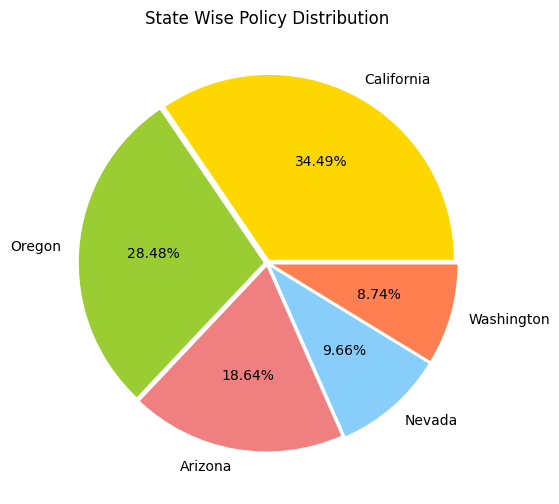

In [111]:
# Pie Chart

state_count = df_insurance_categorical['State'].value_counts().values
state_labels = ['California', 'Oregon', 'Arizona', 'Nevada', 'Washington']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'coral'] # colors
plt.figure(figsize=(10,6))
plt.pie(state_count, labels=state_labels, explode = (0.02,0.02,0.02,0.03,0.03), autopct='%1.2f%%', colors=colors)
plt.title('State Wise Policy Distribution')
plt.show()

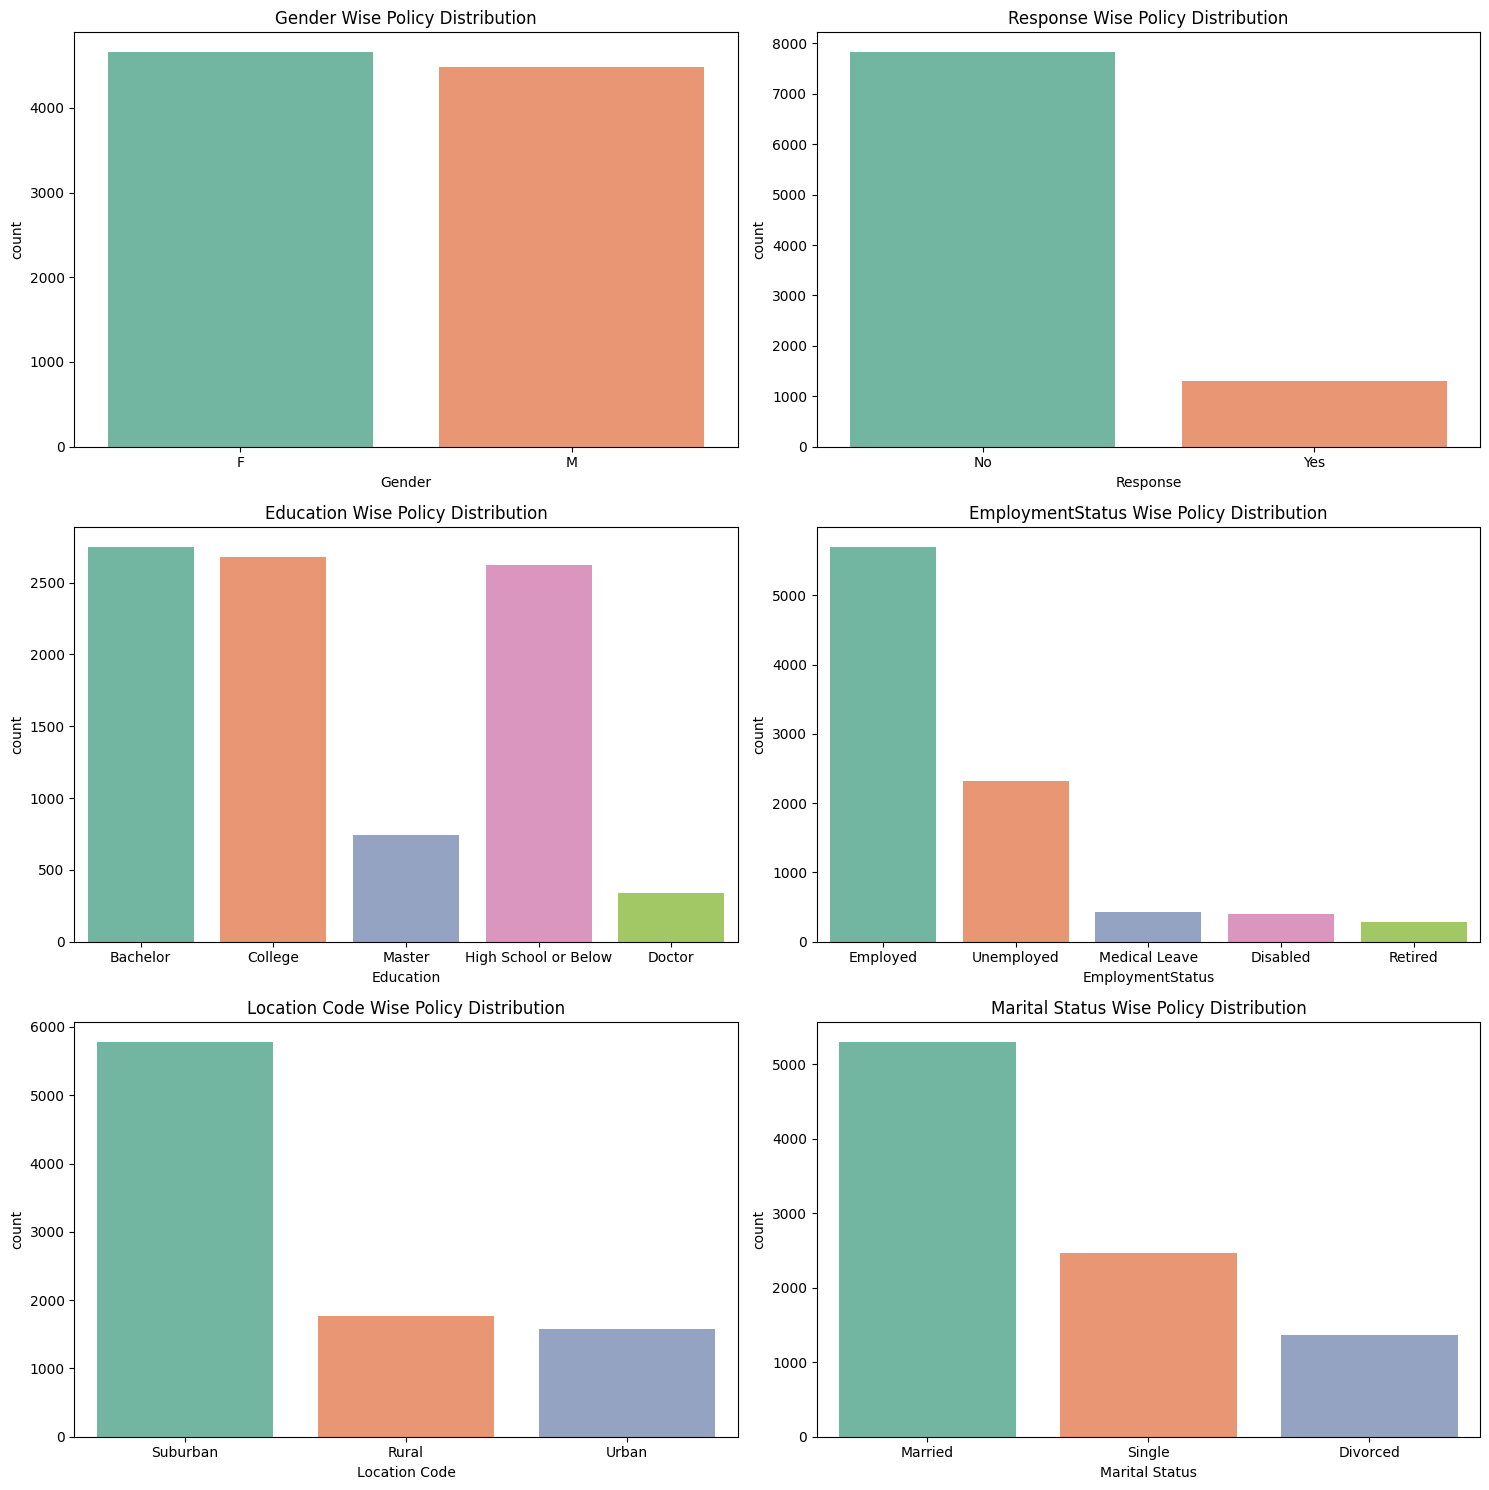

In [135]:
# Categorical Values Count Plot

count_col = ['Gender', 'Response', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status']

plt.figure(figsize=(15,15))

for count, i in enumerate(count_col):
    plt.subplot(3,2,count+1)
    sns.countplot(data=df_insurance_categorical, x=i, hue=i, palette='Set2')
    plt.title(f'{i} Wise Policy Distribution')
  
plt.tight_layout()
plt.show()

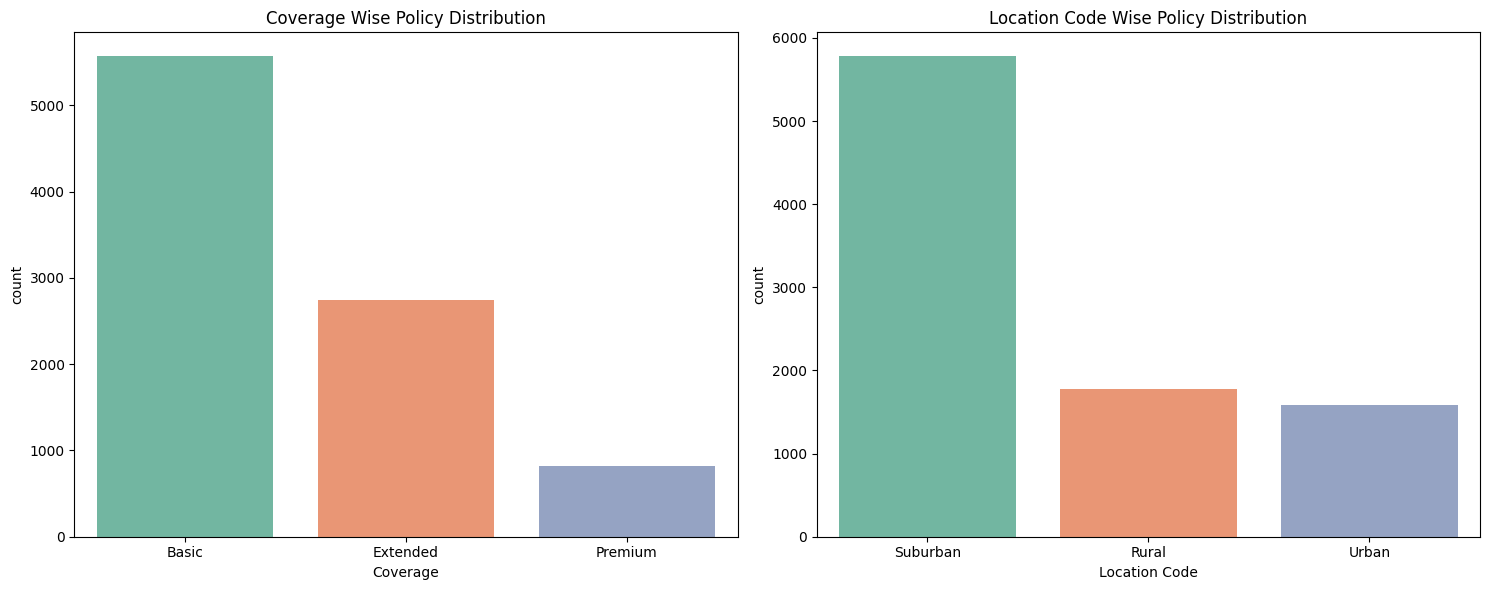

In [154]:
# Categorical Values Count Plot

count_col = ['Coverage', 'Location Code']

plt.figure(figsize=(15,6))

for count, i in enumerate(count_col):
    plt.subplot(1,2,count+1)
    sns.countplot(data=df_insurance_categorical, x=i,hue=i, palette='Set2')
    plt.title(f'{i} Wise Policy Distribution')
  
plt.tight_layout()
plt.show()

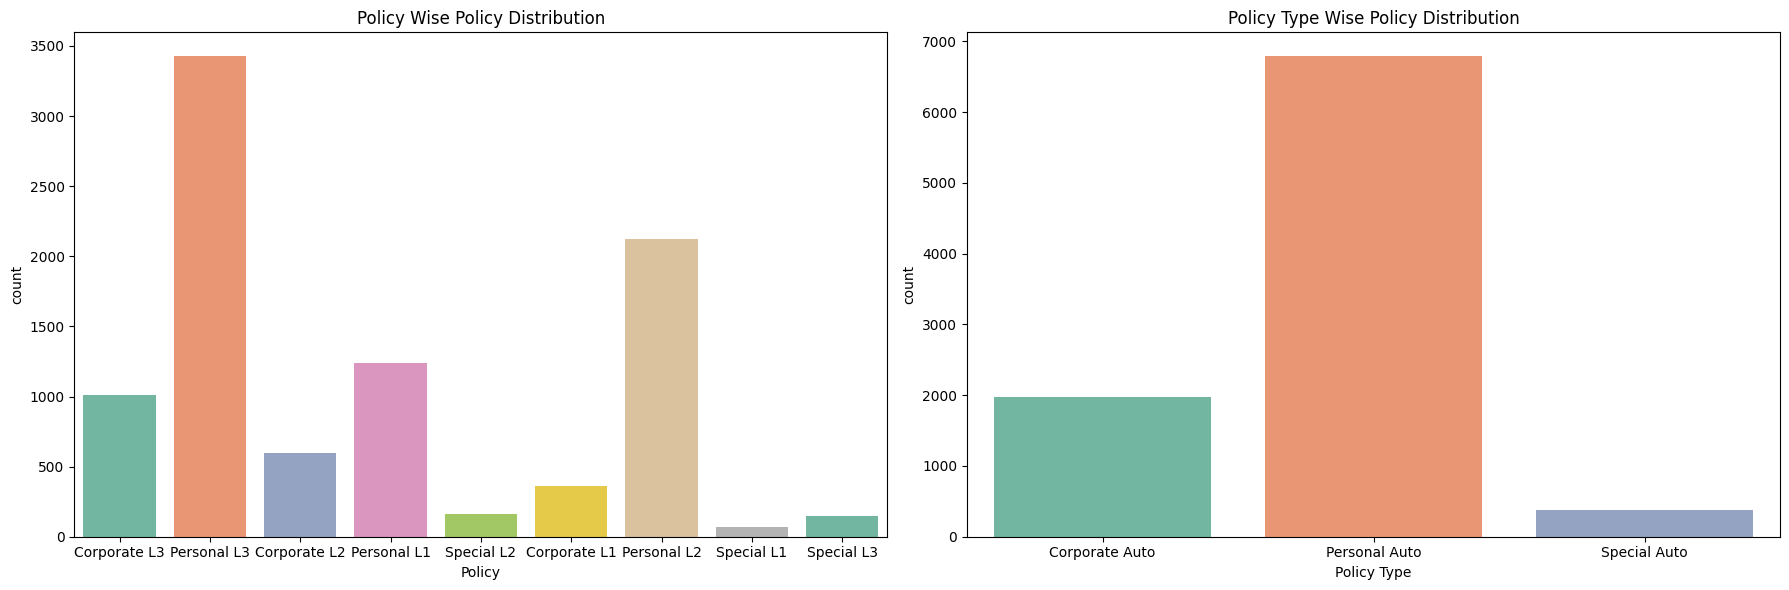

In [160]:
# Categorical Values Count Plot

count_col = ['Policy', 'Policy Type']

plt.figure(figsize=(18,6))

for count, i in enumerate(count_col):
    plt.subplot(1,2,count+1)
    sns.countplot(data=df_insurance_categorical, x=i,hue=i, palette='Set2')
    plt.title(f'{i} Wise Policy Distribution')

plt.tight_layout()
plt.show()

# Numerical Data Types 

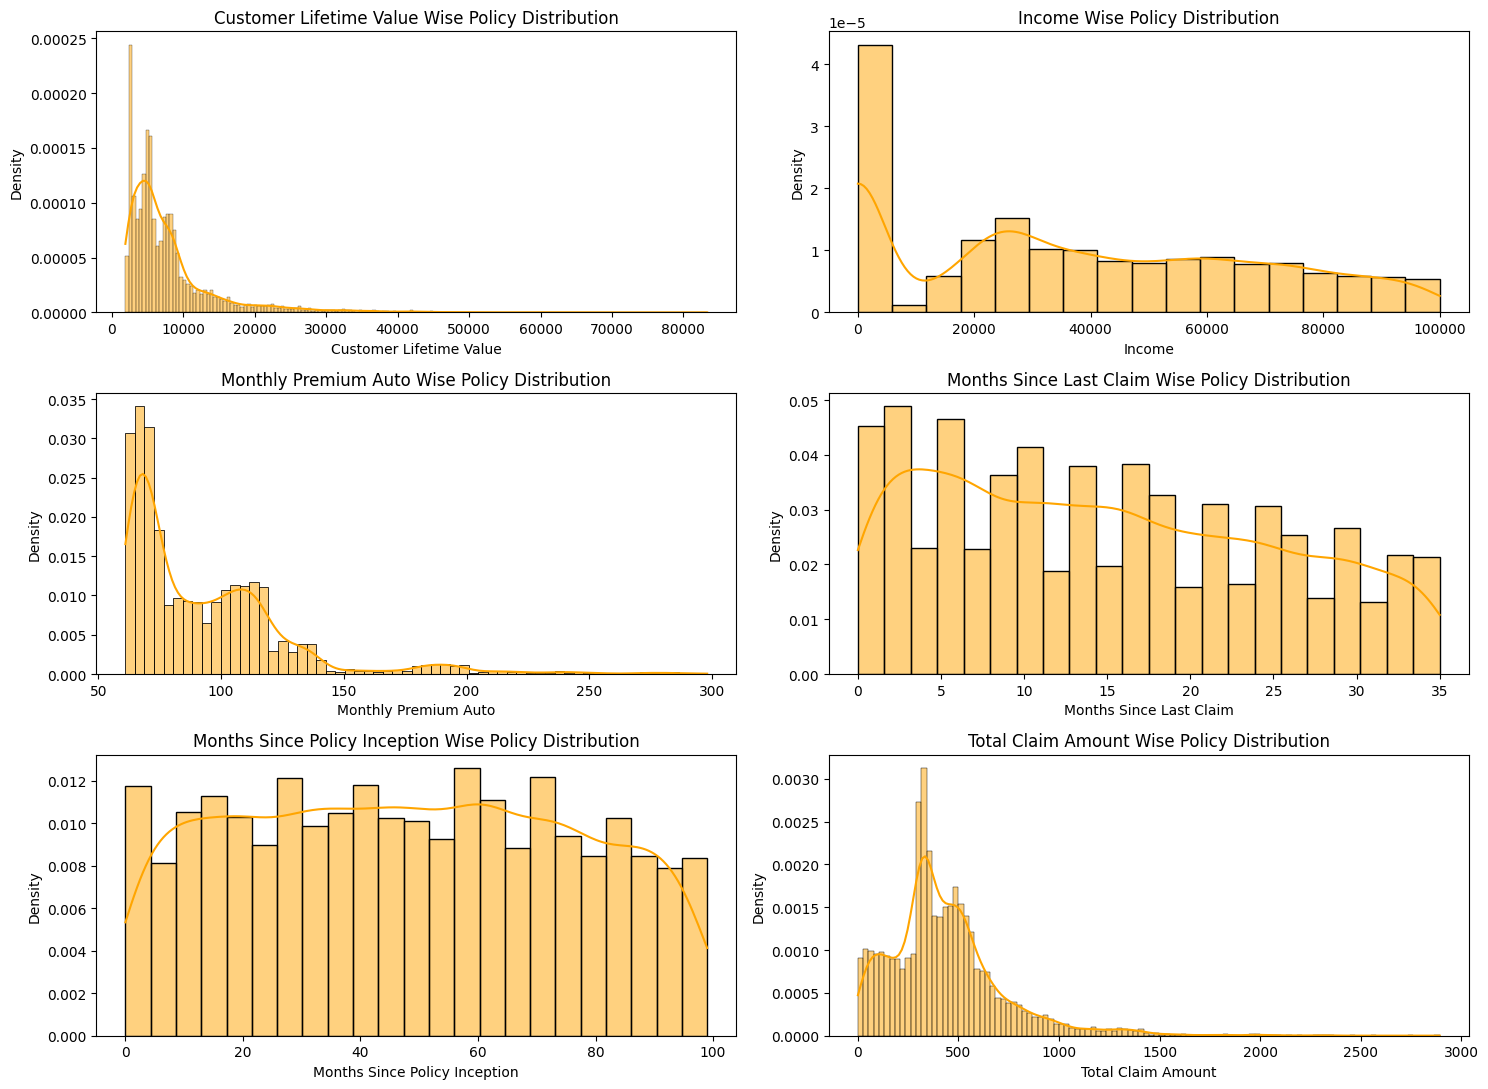

In [193]:
# Numerical Values Hist Plot

count_col = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Total Claim Amount']

plt.figure(figsize=(15,11))

for count, i in enumerate(count_col):
    plt.subplot(3,2,count+1)
    sns.histplot(data=df_insurance_num, x=i, kde=True, color='orange', stat='density')
    plt.title(f'{i} Wise Policy Distribution')

plt.tight_layout()
plt.show()

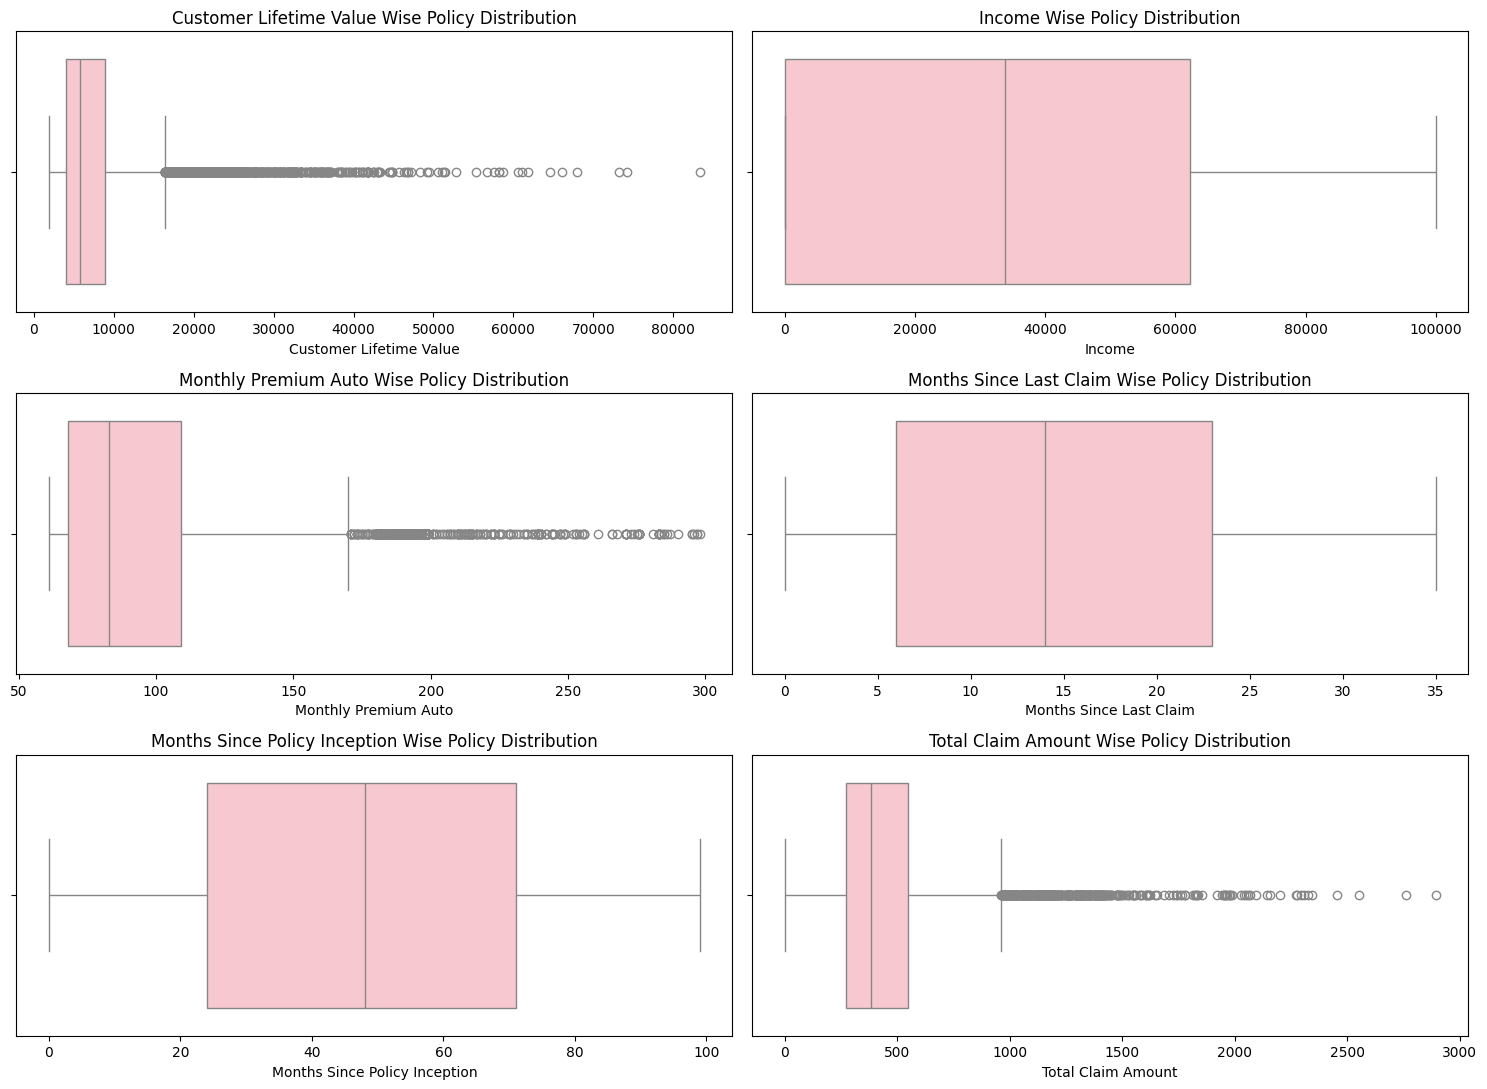

In [195]:
# Numerical Values Box Plot

count_col = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Total Claim Amount']

plt.figure(figsize=(15,11))

for count, i in enumerate(count_col):
    plt.subplot(3,2,count+1)
    sns.boxplot(data=df_insurance_num, x=i, color='pink')
    plt.title(f'{i} Wise Policy Distribution')

plt.tight_layout()
plt.show()

# Bivariate Analysis

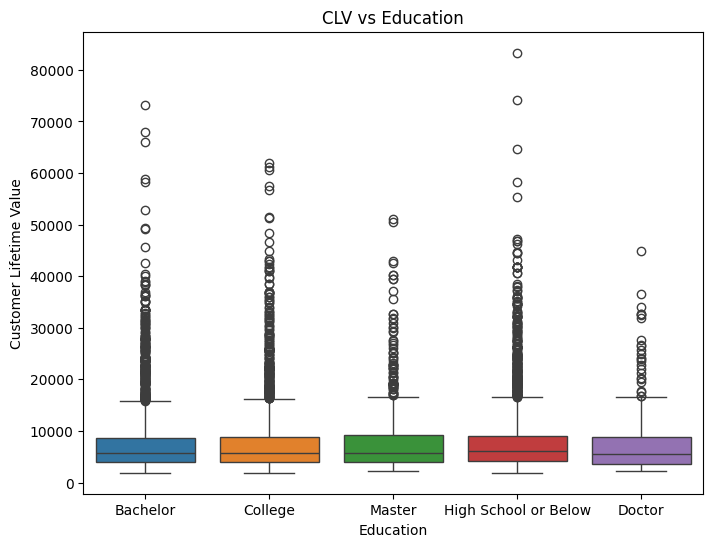

In [205]:
# boxplot of clv with education

plt.figure(figsize=(8,6))
sns.boxplot(data=df_insurance, x='Education',y='Customer Lifetime Value', hue='Education')
plt.title("CLV vs Education")
plt.show()

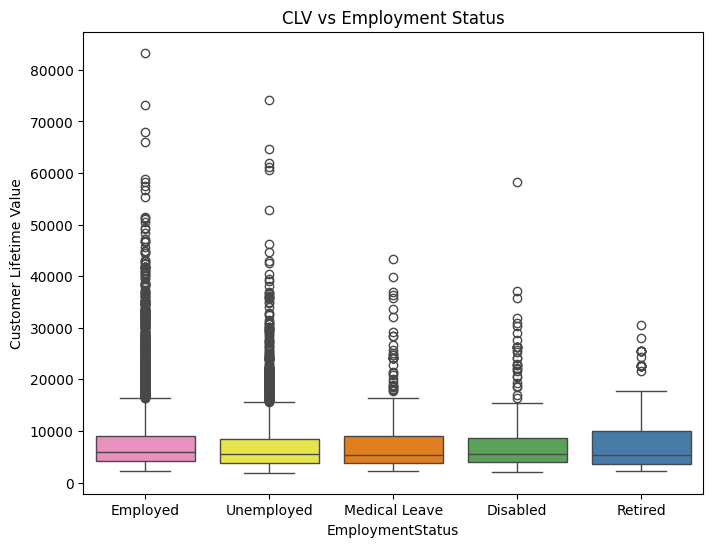

In [222]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_insurance, x='EmploymentStatus',y='Customer Lifetime Value', hue='EmploymentStatus', palette='Set1_r')
plt.title("CLV vs Employment Status")
plt.show()

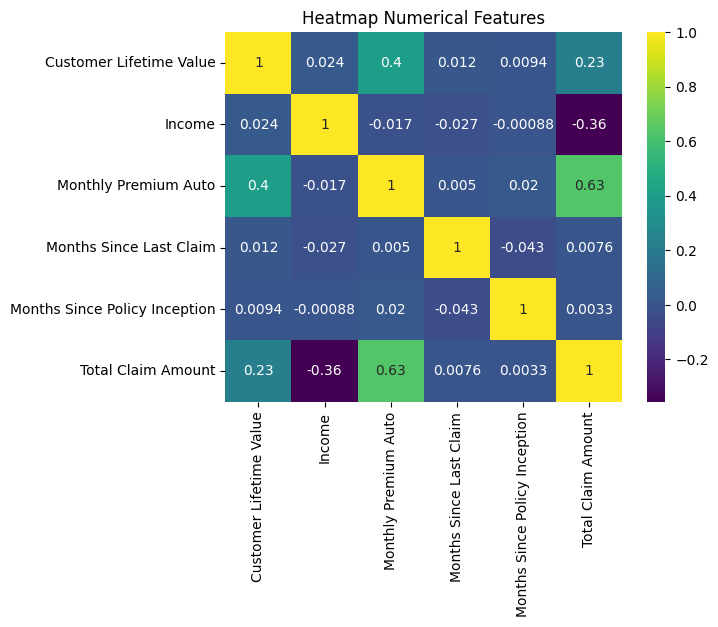

In [230]:
correlation_auto = df_insurance_num.corr()

sns.heatmap(data=correlation_auto, annot= True, cmap='viridis')
plt.title('Heatmap Numerical Features')
plt.show()

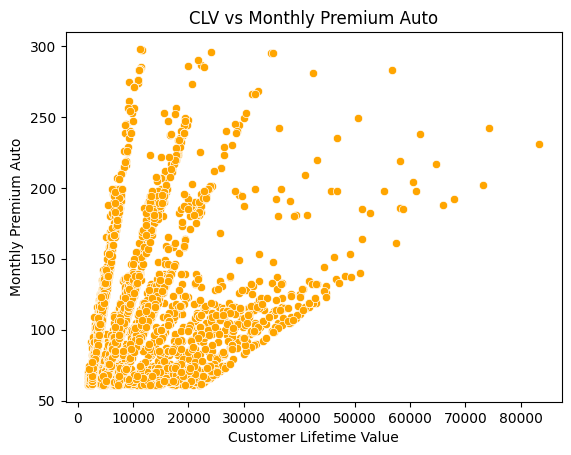

In [234]:
sns.scatterplot(data=df_insurance_num, x='Customer Lifetime Value', y='Monthly Premium Auto', color = 'orange')
plt.title('CLV vs Monthly Premium Auto')
plt.show()

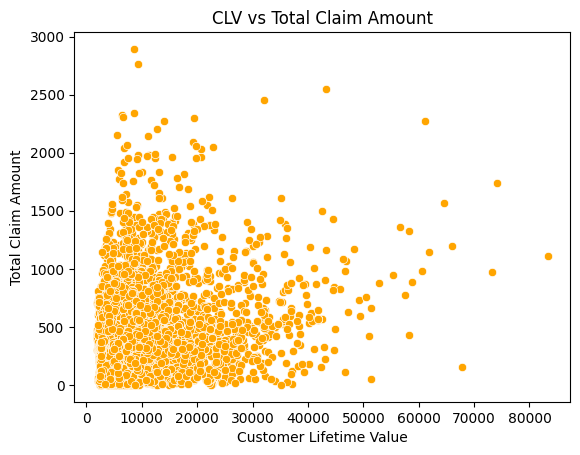

In [236]:
sns.scatterplot(data=df_insurance_num, x='Customer Lifetime Value', y='Total Claim Amount', color = 'orange')
plt.title('CLV vs Total Claim Amount')
plt.show()

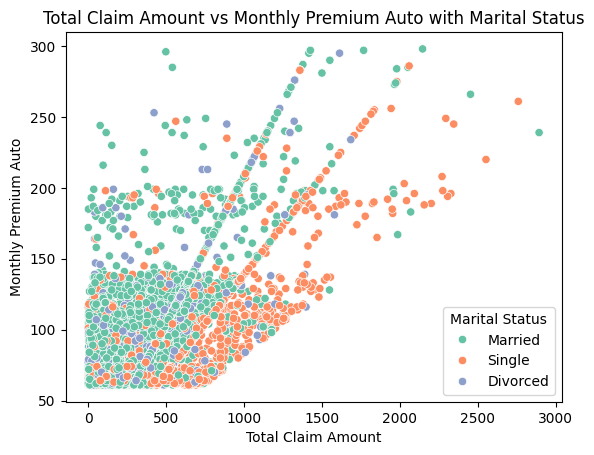

In [240]:
sns.scatterplot(data=df_insurance, x='Total Claim Amount', y='Monthly Premium Auto', hue='Marital Status',palette='Set2')
plt.title('Total Claim Amount vs Monthly Premium Auto with Marital Status')
plt.show()

# Model Building

In [241]:
# Converting all the categorical data to Numerical Form

df_insurance_categorical_dumi = pd.get_dummies(data= df_insurance_categorical, drop_first=True)

In [17]:
# Concating the categorical converted data to numerical data and saving into new variable

df_insurance_model = pd.concat([df_insurance_num,df_insurance_categorical_dumi],axis=1)

In [18]:
df_insurance_model.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,384.811147,0,1,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,6979.535903,0,94,13,42,1131.464935,0,8,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,12887.431650,48767,108,18,38,566.472247,0,2,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,7645.861827,0,106,18,65,529.881344,0,7,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False
4,2813.692575,43836,73,12,44,138.130879,0,1,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


## Linear Regression

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
x = df_insurance_model.drop(['Customer Lifetime Value'], axis=1)
y = df_insurance_model[['Customer Lifetime Value']]

In [245]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [246]:
from sklearn.linear_model import LinearRegression
LRM = LinearRegression()
LRM

LinearRegression()

In [247]:
LRM.fit(x_train,y_train)

LinearRegression()

In [248]:
LRM.score(x_train,y_train)

0.1713937813318056

In [301]:
LRM.score(x_test,y_test)

0.15485403892071004

R Squared for Liner regression: 0.15485403892071004


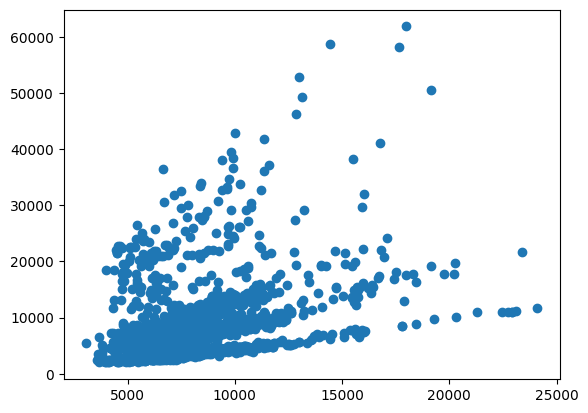

In [302]:
y_pred_lr = LRM.predict(x_test)
print(f'R Squared for Liner regression: {r2_score(y_test,y_pred_lr)}')

plt.scatter(y_pred_lr,y_test)
plt.show()

## Decission tree

In [250]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=200, min_samples_leaf=50, max_leaf_nodes=200)
dt

DecisionTreeRegressor(max_depth=200, max_leaf_nodes=200, min_samples_leaf=50)

In [251]:
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=200, max_leaf_nodes=200, min_samples_leaf=50)

In [252]:
dt.score(x_train,y_train)

0.7125759564824233

In [253]:
dt.score(x_test, y_test)

0.6714102763306569

R Squared for Decission tree regression: 0.6714102763306569


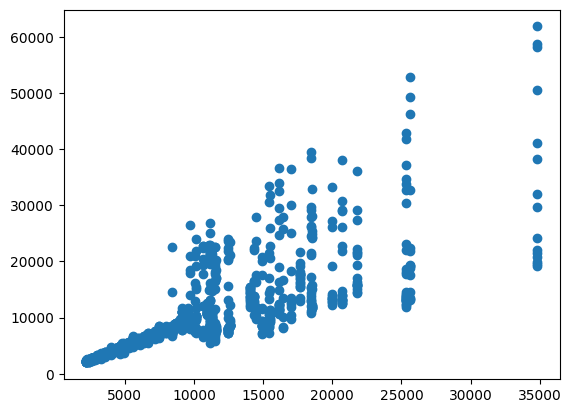

In [307]:
y_pred_dt = dt.predict(x_test)
print(f'R Squared for Decission tree regression: {r2_score(y_test,y_pred_dt)}')

plt.scatter(y_pred_dt,y_test)
plt.show()

## Random Forest 

In [258]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
rf = RandomForestRegressor(n_estimators=150, max_depth=100)
rf

RandomForestRegressor(max_depth=100, n_estimators=150)

In [259]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=100, n_estimators=150)

In [260]:
rf.score(x_test,y_test)

0.6909215516830842

In [261]:
rf.score(x_train,y_train)

0.9581182027223927

R Squared for Random Forest regression: 0.6909215516830842


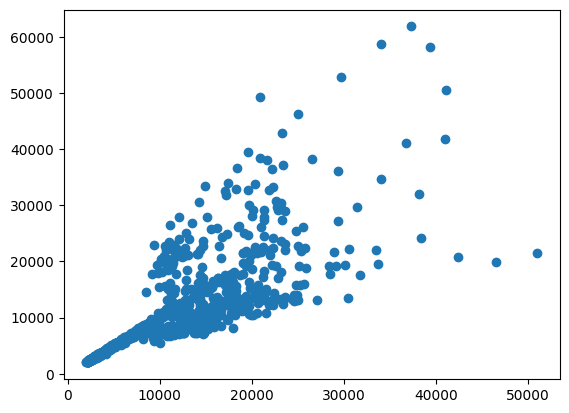

In [308]:
y_pred_rf = rf.predict(x_test)
print(f'R Squared for Random Forest regression: {r2_score(y_test,y_pred_rf)}')

plt.scatter(y_pred_rf,y_test)
plt.show()

## ADA Boost

In [262]:
# Ada Boost Regressor
ada =AdaBoostRegressor(loss= 'square', n_estimators= 100 )
ada

AdaBoostRegressor(loss='square', n_estimators=100)

In [263]:
ada.fit(x_train,y_train)

AdaBoostRegressor(loss='square', n_estimators=100)

In [264]:
ada.score(x_train,y_train)

-0.2686060114150053

In [265]:
ada.score(x_test,y_test)

-0.3119310284097434

R Squared for ADA Boost Regressor: -0.3119310284097434


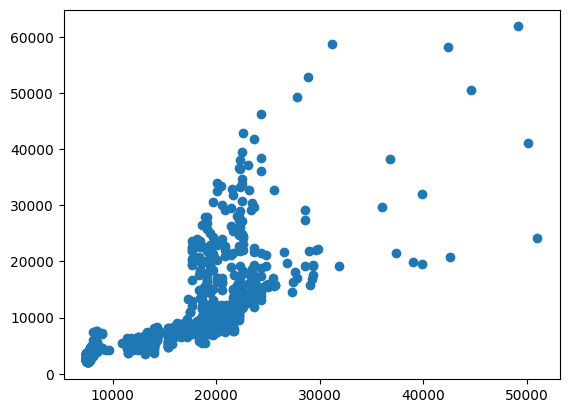

In [306]:
y_pred_ada = ada.predict(x_test)
print(f'R Squared for ADA Boost Regressor: {r2_score(y_test,y_pred_ada)}')

plt.scatter(y_pred_ada,y_test)
plt.show()

## Bagging Regressor


In [286]:
# Bagging Regressor
bg = BaggingRegressor(n_estimators=60, max_features=40)
bg

BaggingRegressor(max_features=40, n_estimators=60)

In [287]:
bg.fit(x_train,y_train)

BaggingRegressor(max_features=40, n_estimators=60)

In [288]:
bg.score(x_train,y_train)

0.9529517917801584

In [289]:
bg.score(x_test,y_test)

0.6957839397893746

R Squared for Bagging Regressor: 0.6957839397893746


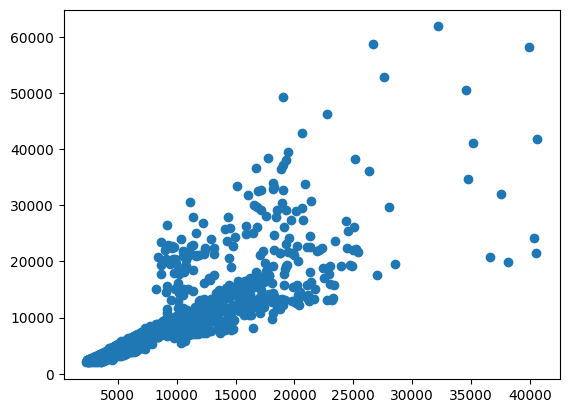

In [310]:
y_pred_bg = bg.predict(x_test)
print(f'R Squared for Bagging Regressor: {r2_score(y_test,y_pred_bg)}')

plt.scatter(y_pred_bg,y_test)
plt.show()

## Gradient Boosting regressor 

In [311]:
# Gradient Regressor
gr = GradientBoostingRegressor(criterion='squared_error',max_depth=50)
gr

GradientBoostingRegressor(criterion='squared_error', max_depth=50)

In [312]:
gr.fit(x_train,y_train)

GradientBoostingRegressor(criterion='squared_error', max_depth=50)

In [313]:
gr.score(x_train,y_train)

0.9999999992944921

In [314]:
gr.score(x_test,y_test)

0.36261698376127904

R Squared for Gradient Boosting Regressor: 0.36261698376127904


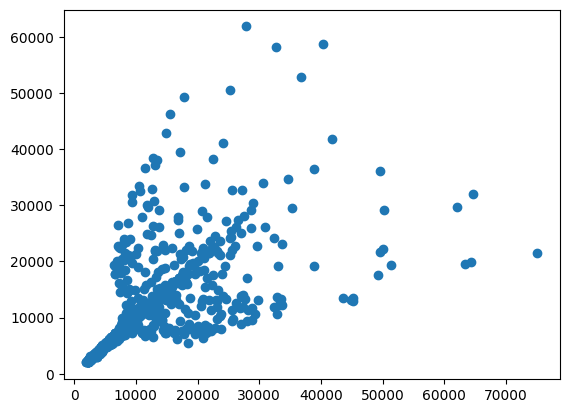

In [315]:
y_pred_gr = gr.predict(x_test)
print(f'R Squared for Gradient Boosting Regressor: {r2_score(y_test,y_pred_gr)}')

plt.scatter(y_pred_gr,y_test)
plt.show()

## After Doing Modeling it can be observed that Random Forest and Bagging Regressors gave the best results after predictiion with the help of x_test Data.